## 오차 행렬(Confusion Matrix)

- 예측 오류가 얼마인지와 어떤 유형의 예측 오류가 발생하는지를 나타냄

    - TN(True Negative): Negative로 예측한 것이 맞는 경우
    - FP(False Positive): Positive로 예측한 것이 틀린 경우
    - FN(False Negative): Negative로 예측한 것이 틀린 경우
    - TP(True Positive): Positive로 예측한 것이 맞는 경우

    정확도(Accuracy) = (TN + TP) / (TN + FP + FN + TP)

# 정밀도(Preicision) & 재현율(Recall)
- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

    - Preicision = TP / (FP + TP)
    - Recall = TP / (FN + TP)

In [17]:
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # PassengerId, Name, Ticket 은 생존율에 영향이 없을 것이라 판단
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    
def get_clf_eval(y_test, predictions):
    print('Confusion Matrix\n', confusion_matrix(y_test, predictions))
    print('Accuracy: ', accuracy_score(y_test, predictions))
    print('Precision: ', precision_score(y_test, predictions))
    print('Recall: ', recall_score(y_test, predictions))

titanic_df = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2)

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
get_clf_eval(y_test, pred)

Confusion Matrix
 [[96 14]
 [20 49]]
Accuracy:  0.8100558659217877
Precision:  0.7777777777777778
Recall:  0.7101449275362319


## 트레이드 오프(Trade-off)
- 정밀도와 재현율의 관계는 한쪽이 커지면 한쪽이 작아지는 관계이다. 즉 Trade-off이다
    - 테스트 데이터에 대한 예측 확률을 확인해야 => predict_proba() 이용

In [19]:
pred_prob = clf.predict_proba(X_test)
print(pred_prob)

[[0.85787171 0.14212829]
 [0.67592791 0.32407209]
 [0.31664458 0.68335542]
 [0.63923556 0.36076444]
 [0.88952977 0.11047023]
 [0.87585974 0.12414026]
 [0.31250512 0.68749488]
 [0.83108487 0.16891513]
 [0.22873634 0.77126366]
 [0.8596841  0.1403159 ]
 [0.18862301 0.81137699]
 [0.06181508 0.93818492]
 [0.07277627 0.92722373]
 [0.85207773 0.14792227]
 [0.87585974 0.12414026]
 [0.8829964  0.1170036 ]
 [0.37354415 0.62645585]
 [0.1780417  0.8219583 ]
 [0.71976391 0.28023609]
 [0.86770205 0.13229795]
 [0.8627628  0.1372372 ]
 [0.98911478 0.01088522]
 [0.53827893 0.46172107]
 [0.71455512 0.28544488]
 [0.71686343 0.28313657]
 [0.15439975 0.84560025]
 [0.16712525 0.83287475]
 [0.86086881 0.13913119]
 [0.4735792  0.5264208 ]
 [0.87596674 0.12403326]
 [0.82873472 0.17126528]
 [0.78449086 0.21550914]
 [0.01029505 0.98970495]
 [0.78073405 0.21926595]
 [0.84706175 0.15293825]
 [0.58753466 0.41246534]
 [0.87089564 0.12910436]
 [0.63863243 0.36136757]
 [0.90491999 0.09508001]
 [0.84718657 0.15281343]


In [20]:
result = np.concatenate([pred_prob, pred.reshape(-1, 1)], axis=1)
print(result)

[[0.85787171 0.14212829 0.        ]
 [0.67592791 0.32407209 0.        ]
 [0.31664458 0.68335542 1.        ]
 [0.63923556 0.36076444 0.        ]
 [0.88952977 0.11047023 0.        ]
 [0.87585974 0.12414026 0.        ]
 [0.31250512 0.68749488 1.        ]
 [0.83108487 0.16891513 0.        ]
 [0.22873634 0.77126366 1.        ]
 [0.8596841  0.1403159  0.        ]
 [0.18862301 0.81137699 1.        ]
 [0.06181508 0.93818492 1.        ]
 [0.07277627 0.92722373 1.        ]
 [0.85207773 0.14792227 0.        ]
 [0.87585974 0.12414026 0.        ]
 [0.8829964  0.1170036  0.        ]
 [0.37354415 0.62645585 1.        ]
 [0.1780417  0.8219583  1.        ]
 [0.71976391 0.28023609 0.        ]
 [0.86770205 0.13229795 0.        ]
 [0.8627628  0.1372372  0.        ]
 [0.98911478 0.01088522 0.        ]
 [0.53827893 0.46172107 0.        ]
 [0.71455512 0.28544488 0.        ]
 [0.71686343 0.28313657 0.        ]
 [0.15439975 0.84560025 1.        ]
 [0.16712525 0.83287475 1.        ]
 [0.86086881 0.13913119 0.  

In [35]:
from sklearn.preprocessing import Binarizer

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
pred_prob2 = pred_prob[:, 1].reshape(-1, 1)

# 정확도/정밀도/재현율 중 최적의 평가 지표를 찾기위한 Threshold(문턱 값) 조정
ths = [0.4, 0.45, 0.5, 0.55, 0.6]
for th in ths:
    binarizer = Binarizer(threshold=th).fit(pred_prob2)
    custom_pred = binarizer.transform(pred_prob2)
    print('Threshold: {}'.format(th))
    get_clf_eval(y_test, custom_pred)
    print()

Threshold: 0.4
Confusion Matrix
 [[97 21]
 [11 50]]
Accuracy:  0.8212290502793296
Precision:  0.704225352112676
Recall:  0.819672131147541

Threshold: 0.45
Confusion Matrix
 [[105  13]
 [ 13  48]]
Accuracy:  0.8547486033519553
Precision:  0.7868852459016393
Recall:  0.7868852459016393

Threshold: 0.5
Confusion Matrix
 [[108  10]
 [ 14  47]]
Accuracy:  0.8659217877094972
Precision:  0.8245614035087719
Recall:  0.7704918032786885

Threshold: 0.55
Confusion Matrix
 [[111   7]
 [ 16  45]]
Accuracy:  0.8715083798882681
Precision:  0.8653846153846154
Recall:  0.7377049180327869

Threshold: 0.6
Confusion Matrix
 [[113   5]
 [ 17  44]]
Accuracy:  0.8770949720670391
Precision:  0.8979591836734694
Recall:  0.7213114754098361



In [38]:
from sklearn.metrics import precision_recall_curve

pred_prob = clf.predict_proba(X_test)[:, 1]

precisions, recalls, ths = precision_recall_curve(y_test, pred_prob)
print(ths.shape)

th_index = np.arange(0, ths.shape[0], 15)
print("Thresholds' index", th_index)
print('Thresholds: ', ths[th_index])
print('Precisions: ', precisions[th_index])
print('Recalls: ', recalls[th_index])

(147,)
Thresholds' index [  0  15  30  45  60  75  90 105 120 135]
Thresholds:  [0.11573102 0.13174371 0.14927476 0.17288742 0.25749269 0.37571831
 0.4920994  0.6287642  0.75924584 0.89611669]
Precisions:  [0.37888199 0.42446043 0.45454545 0.51886792 0.61797753 0.67567568
 0.79661017 0.93023256 0.96428571 1.        ]
Recalls:  [1.         0.96721311 0.90163934 0.90163934 0.90163934 0.81967213
 0.7704918  0.6557377  0.44262295 0.21311475]


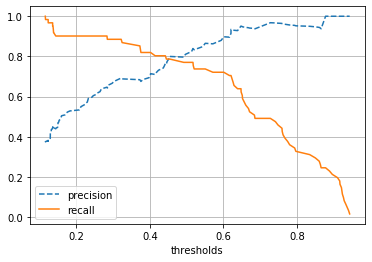

In [40]:
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test, pred_prob):
    precisions, recalls, ths = precision_recall_curve(y_test, pred_prob)

    th_boundary = ths.shape[0]
    plt.plot(ths, precisions[0:th_boundary], linestyle='--', label='precision')
    plt.plot(ths, recalls[0:th_boundary], label='recall')

    plt.xlabel('thresholds')
    plt.legend()
    plt.grid()

    plt.show()

precision_recall_curve_plot(y_test, pred_prob)